In [1]:
# Import Numpy, TensorFlow, Keras and vectorized MNIST data
import numpy as np
from numpy import array
#import tensorflow as tf
import keras
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Load the training set:
train_set = pd.read_csv('cnn_digist/train.csv')
# extract the labels:
train_label = train_set.label
# training features, normalized:
train_feat = np.array(train_set.iloc[:, 1:])/255
# reshape the column vector to row array
train_label = np.array(train_label).reshape(-1, 1)
# one hot encode labels:
encoded_label = to_categorical(train_label)

In [3]:
data = train_feat.reshape((train_feat.shape[0], 28, 28, 1))

In [4]:
data.shape

(42000, 28, 28, 1)

In [5]:
# Define the Sequential CNN
model = Sequential() 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# Initialize and compile:
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Training
history = model.fit(data, encoded_label, validation_split=0.1,  batch_size=64, epochs=8, verbose=0)

In [7]:
predictions = model.predict(np.array(data)).argmax(axis=1)

actual = train_label[:,0]
# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
train_accuracy = np.mean(predictions == actual)

# Print out the result
print("Train accuracy: ", train_accuracy)

Train accuracy:  0.996142857143


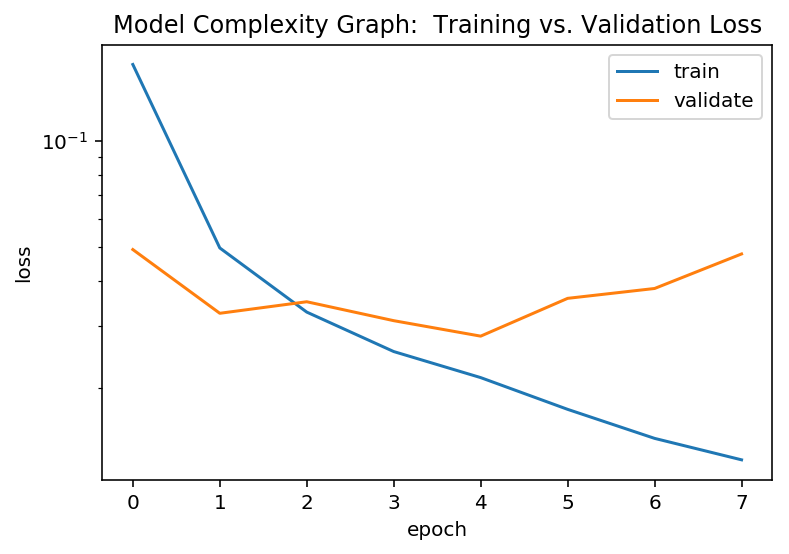

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

In [9]:
# Load the test set:
test_set = pd.read_csv('../input/test.csv')
# test features:
test_feat = np.array(test_set)/255

FileNotFoundError: File b'../input/test.csv' does not exist

In [ ]:
test_data = test_feat.reshape((test_feat.shape[0], 28, 28, 1))

predictions = model.predict(np.array(test_data)).argmax(axis=1)

In [ ]:
a = np.asarray(predictions).astype(int)
np.savetxt("Zikri_test_predictions.csv",  a, delimiter=",", fmt="%s")